##### A simple exercise to review classification algorithms in machine learning.

In [151]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [152]:
data = pd.read_csv("train.csv")

In [153]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [228]:
data.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,8.037459,2.319218,0.781759,17.957655,5403.459283,1621.245798,153.420195,342.000000,28.623779,1.912052,0.687296
std,49.158600,23.826022,0.413389,76.045501,6109.041673,2926.248369,91.575245,64.372489,93.383142,0.815081,0.463973
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,2.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,175.000000,360.000000,1.000000,3.000000,1.000000
max,342.000000,342.000000,1.000000,342.000000,81000.000000,41667.000000,700.000000,480.000000,342.000000,3.000000,1.000000


In [155]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [156]:
data["Gender"] = data["Gender"].map({"Male":1,"Female":0})
data["Married"] = data["Married"].map({"Yes":1,"No":0})
data["Self_Employed"] = data["Self_Employed"].map({"Yes":1,"No":0})
data["Education"] = data['Education'].map({'Graduate':1,'Not Graduate':0})
data["Property_Area"] = data["Property_Area"].map({'Semiurban':1,'Urban':2,'Rural':3})
data["Loan_Status"] = data['Loan_Status'].map({'Y':1,'N':0})
data['Dependents'].replace('3+',3,inplace=True)

In [157]:
data["Dependents"].value_counts()

Dependents
0    345
1    102
2    101
3     51
Name: count, dtype: int64

# data encoding for remove nan data

In [158]:
remove_nan = data[["Gender","Married",'Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']]

In [159]:
remove_nan

,Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History
0,1.0,0.0,0,0.0,NaN,360.0,1.0
1,1.0,1.0,1,0.0,128.0,360.0,1.0
2,1.0,1.0,0,1.0,66.0,360.0,1.0
3,1.0,1.0,0,0.0,120.0,360.0,1.0
4,1.0,0.0,0,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...
609,0.0,0.0,0,0.0,71.0,360.0,1.0
610,1.0,1.0,3,0.0,40.0,180.0,1.0
611,1.0,1.0,1,0.0,253.0,360.0,1.0
612,1.0,1.0,2,0.0,187.0,360.0,1.0


In [160]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [161]:
rev_null=['Gender','Married','Dependents','Self_Employed','Credit_History','LoanAmount','Loan_Amount_Term']
data[rev_null]=data[rev_null].replace({np.nan:data['Gender'].mode(),
                                   np.nan:data['Married'].mode(),
                                   np.nan:data['Dependents'].mode(),
                                   np.nan:data['Self_Employed'].mode(),
                                   np.nan:data['Credit_History'].mode(),
                                   np.nan:data['LoanAmount'].mean(),
                                   np.nan:data['Loan_Amount_Term'].mean()})

In [162]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# drop data for give corealation
data.drop("Loan_ID",inplace=True,axis=1)

<Axes: >

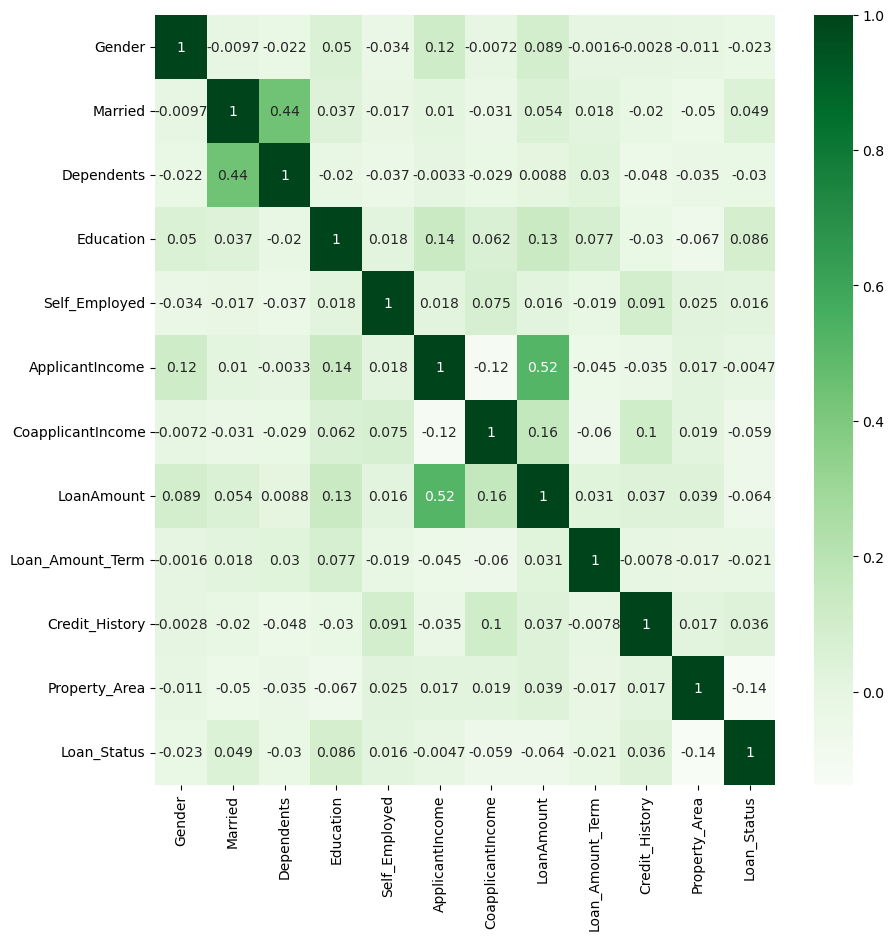

In [234]:
corr = data.corr()
plt.figure(figsize=(10,10))
sb.heatmap(corr,annot=True,cmap="Greens")

### Export clean datasete

In [163]:
data.to_excel("train_edit.xlsx",sheet_name='Sheet_name_1')

### split x,y feature 

In [164]:
x = data.iloc[:,1:-1].values
y = data.iloc[:,-1].values

#### global variable for use in function

In [165]:
global x
global y

### train test split

In [166]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=20,test_size=0.2)

### Scaling Data

In [167]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Use Classification Model

In [249]:
from sklearn.metrics import accuracy_score,f1_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
class machine_learning:
    
    def knn(number_of_n_negbor:int=5,random_stat:int=42,test_sz:int=0.2):
        from sklearn.model_selection import train_test_split
        x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=random_stat,test_size=test_sz)
        knn = KNeighborsClassifier(n_neighbors=number_of_n_negbor)
        knn.fit(x_train,y_train)
        y_pred = knn.predict(x_test)
        print(f"accuracy score is : {metrics.accuracy_score(y_test,y_pred)}\n")
        print(f"f1 score is  : {metrics.f1_score(y_test,y_pred)}\n")
        print(f"classification_report : \n{metrics.classification_report(y_test,y_pred)}\n")
    def svc(kernl:str="rbf",random_stat:int=42,test_sz:int=0.2):
        from sklearn.model_selection import train_test_split
        x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=random_stat,test_size=test_sz)
        svm = SVC(kernel=kernl)
        svm.fit(x_train,y_train)
        y_pred = svm.predict(x_test)
        print(f"accuracy score is : {metrics.accuracy_score(y_test,y_pred)}\n")
        print(f"f1 score is  : {metrics.f1_score(y_test,y_pred)}\n")
        print(f"classification_report : \n{metrics.classification_report(y_test,y_pred)}\n")
        
    def logestic(random_stat:int=42,test_sz:int=0.2):
        from sklearn.model_selection import train_test_split
        x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=random_stat,test_size=test_sz)
        log = LogisticRegression()
        log.fit(x_train,y_train)
        y_pred = log.predict(x_test)
        print(f"accuracy score is : {metrics.accuracy_score(y_test,y_pred)}\n")
        print(f"f1 score is  : {metrics.f1_score(y_test,y_pred)}\n")
        print(f"classification_report : \n{metrics.classification_report(y_test,y_pred)}\n")
    def random_forest(dataset,number_of_tree:int=100,random_stat:int=42,test_sz:int=0.2,plot:bool=False):
        from sklearn.model_selection import train_test_split
        x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=random_stat,test_size=test_sz)
        rfc = RandomForestClassifier(criterion="entropy",random_state=random_stat,n_estimators=number_of_tree)
        rfc.fit(x_train,y_train)
        y_pred = rfc.predict(x_test)
        print(f"accuracy score is : {metrics.accuracy_score(y_test,y_pred)}\n")
        print(f"f1 score is  : {metrics.f1_score(y_test,y_pred)}\n")
        print(f"classification_report : \n{metrics.classification_report(y_test,y_pred)}\n")
        print("-------------------------------------------------------------")
        if plot == True:
            feature_importance=pd.DataFrame({'rfc':rfc.feature_importances_},index=dataset.drop(columns=['Loan_Status']).columns)
            feature_importance.sort_values(by='rfc',ascending=True,inplace=True)

            index = np.arange(len(feature_importance))
            fig, ax = plt.subplots(figsize=(18,8))
            rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='purple',label='Random Forest')
            ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

            ax.legend()
            plt.show()
        
    def NVBASE(random_stat:int=42,test_sz:int=0.2):
        from sklearn.model_selection import train_test_split
        x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=random_stat,test_size=test_sz)
        nb = GaussianNB()
        nb.fit(x_train,y_train)
        y_pred = nb.predict(x_test)
        print(f"accuracy score is : {metrics.accuracy_score(y_test,y_pred)}\n")
        print(f"f1 score is  : {metrics.f1_score(y_test,y_pred)}\n")
        print(f"classification_report : \n{metrics.classification_report(y_test,y_pred)}\n")
        

In [217]:

for i in range(2,21):
    print("result of n_nighber for number of n_nighber : ",i,"\n")
    xz = machine_learning.knn(number_of_n_negbor=i,random_stat=42,test_sz=0.2)
    print("-----------------------------------")
    
   


result of n_nighber for number of n_nighber :  2 

accuracy score is : 0.6097560975609756

f1 score is  : 0.7073170731707318

classification_report : 
              precision    recall  f1-score   support

           0       0.44      0.40      0.41        43
           1       0.69      0.72      0.71        80

    accuracy                           0.61       123
   macro avg       0.56      0.56      0.56       123
weighted avg       0.60      0.61      0.60       123


-----------------------------------
result of n_nighber for number of n_nighber :  3 

accuracy score is : 0.6422764227642277

f1 score is  : 0.7608695652173914

classification_report : 
              precision    recall  f1-score   support

           0       0.47      0.21      0.29        43
           1       0.67      0.88      0.76        80

    accuracy                           0.64       123
   macro avg       0.57      0.54      0.53       123
weighted avg       0.60      0.64      0.60       123


------

accuracy score is : 0.6097560975609756

f1 score is  : 0.75

classification_report : 
              precision    recall  f1-score   support

           0       0.27      0.07      0.11        43
           1       0.64      0.90      0.75        80

    accuracy                           0.61       123
   macro avg       0.46      0.48      0.43       123
weighted avg       0.51      0.61      0.53       123


-----------------------------------
result of n_nighber for number of n_nighber :  19 

accuracy score is : 0.6097560975609756

f1 score is  : 0.7525773195876289

classification_report : 
              precision    recall  f1-score   support

           0       0.22      0.05      0.08        43
           1       0.64      0.91      0.75        80

    accuracy                           0.61       123
   macro avg       0.43      0.48      0.41       123
weighted avg       0.49      0.61      0.52       123


-----------------------------------
result of n_nighber for number of 

### ----) n equal 15 for knn:
#### accuracy score is : 0.6260162601626016
#### f1 score is  : 0.7628865979381444

### ----) n equal 3 for knn(best):
#### accuracy score is : 0.6422764227642277
#### f1 score is  : 0.7608695652173914

In [220]:
machine_learning.logestic(random_stat=42,test_sz=0.25)

accuracy score is : 0.6428571428571429

f1 score is  : 0.7808764940239044

classification_report : 
              precision    recall  f1-score   support

           0       0.33      0.02      0.04        54
           1       0.65      0.98      0.78       100

    accuracy                           0.64       154
   macro avg       0.49      0.50      0.41       154
weighted avg       0.54      0.64      0.52       154




In [221]:
machine_learning.NVBASE(random_stat=42,test_sz=0.2)

accuracy score is : 0.43902439024390244

f1 score is  : 0.34285714285714286

classification_report : 
              precision    recall  f1-score   support

           0       0.37      0.84      0.51        43
           1       0.72      0.23      0.34        80

    accuracy                           0.44       123
   macro avg       0.54      0.53      0.43       123
weighted avg       0.60      0.44      0.40       123




### NVBase Not Good idea!

In [242]:
df = data.copy()

accuracy score is : 0.8051948051948052

f1 score is  : 0.8739495798319327

classification_report : 
              precision    recall  f1-score   support

           0       0.74      0.47      0.57        43
           1       0.82      0.94      0.87       111

    accuracy                           0.81       154
   macro avg       0.78      0.70      0.72       154
weighted avg       0.80      0.81      0.79       154


-------------------------------------------------------------


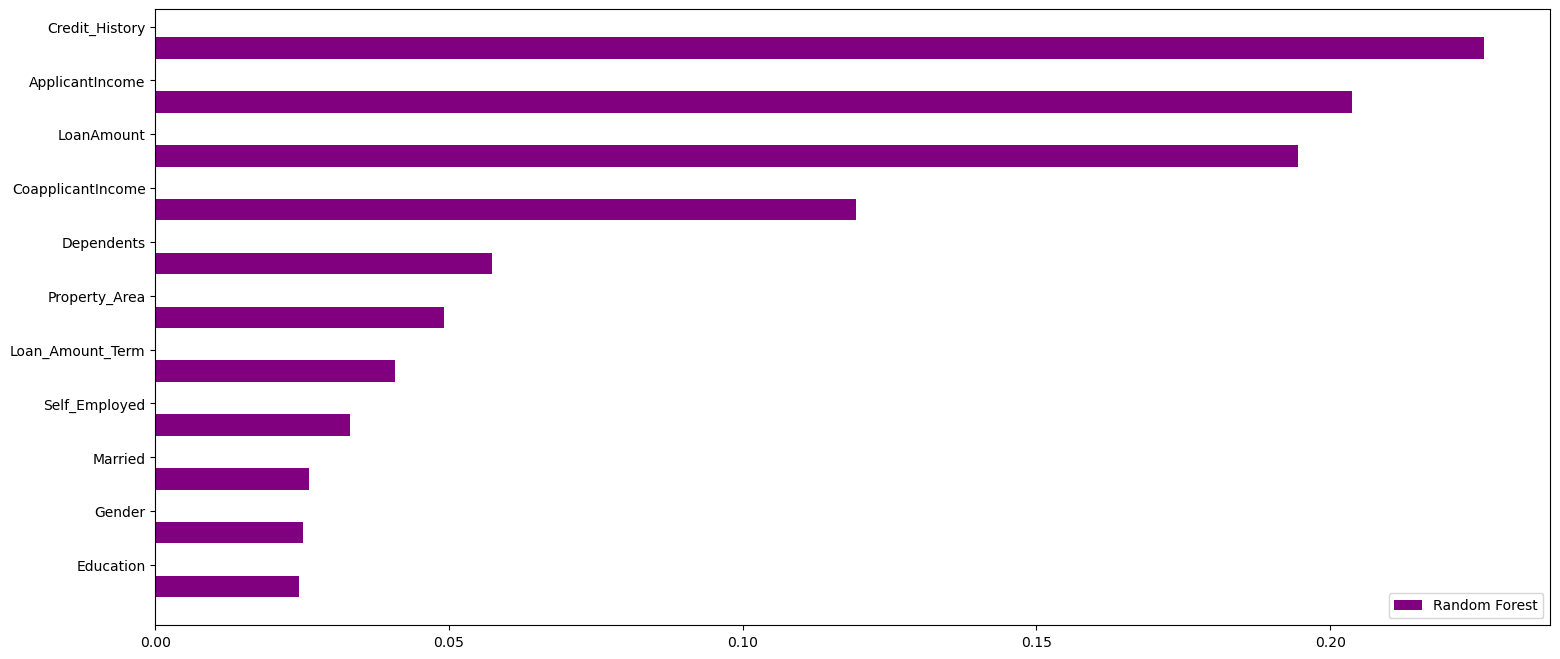

In [251]:
machine_learning.random_forest(df,100,random_stat=0,test_sz=0.25,plot=True)

In [240]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,1,0.0,5849,0.0,342.0,360.0,1.0,2,1
1,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,3,0
2,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,3,1
610,1.0,1.0,3,1,0.0,4106,0.0,40.0,180.0,1.0,3,1
611,1.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,2,1
612,1.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,2,1


### random Forest is Best Algorithem for This Dataset!

In [227]:
machine_learning.svc("rbf",random_stat=42,test_sz=0.25)

accuracy score is : 0.6493506493506493

f1 score is  : 0.7874015748031497

classification_report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.65      1.00      0.79       100

    accuracy                           0.65       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.42      0.65      0.51       154




### SVM Not Bad for this dataset